In [9]:
import pandas as pd

In [10]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd

file_path = '/content/CWC_Campus_Case_Dataset v1.xlsx'
df = pd.read_excel(file_path , sheet_name = '2. Dataset - Deliveries')
df.head()


,match_id,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,wides,...,byes,legbyes,penalty,Extras,Total Run,wicket_type,player_dismissed,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,1,1,0.1,Afghanistan,England,Rahmanullah Gurbaz,Ibrahim Zadran,RJW Topley,0,NaN,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,Row Labels,Count of wicket_type
1,1,1,0.2,Afghanistan,England,Rahmanullah Gurbaz,Ibrahim Zadran,RJW Topley,6,NaN,...,NaN,NaN,NaN,0,6,NaN,NaN,NaN,1,10
2,1,1,0.3,Afghanistan,England,Rahmanullah Gurbaz,Ibrahim Zadran,RJW Topley,1,NaN,...,NaN,NaN,NaN,0,1,NaN,NaN,NaN,1,9
3,1,1,0.4,Afghanistan,England,Ibrahim Zadran,Rahmanullah Gurbaz,RJW Topley,1,NaN,...,NaN,NaN,NaN,0,1,NaN,NaN,NaN,2,1
4,1,1,0.5,Afghanistan,England,Rahmanullah Gurbaz,Ibrahim Zadran,RJW Topley,4,NaN,...,NaN,NaN,NaN,0,4,NaN,NaN,NaN,2,20


In [21]:
import pandas as pd
file_path = '/content/CWC_Campus_Case_Dataset v1.xlsx'

deliveries_df = pd.read_excel(file_path , sheet_name = '2. Dataset - Deliveries')

deliveries_df['ball'] = pd.to_numeric(deliveries_df['ball'], errors='coerce')


# Filter the deliveries that fall within the 3rd powerplay (overs 41-50)
powerplay_deliveries = deliveries_df[(deliveries_df['ball'] >= 41.1) & (deliveries_df['ball'] <= 50)]

# Group by batting team to calculate aggregate run-rate during the 3rd powerplay
powerplay_stats = powerplay_deliveries.groupby('batting_team').agg({
    'Total Run': 'sum',
    'ball': 'count'
}).reset_index()

# Calculate the aggregate run-rate
powerplay_stats['run_rate'] = (powerplay_stats['Total Run'] / powerplay_stats['ball']) * 6

# Determine run-rate when batting first vs. batting second
# We'll assume innings 1 is batting first, and innings 2 is batting second
first_innings_powerplay = powerplay_deliveries[powerplay_deliveries['innings'] == 1]
second_innings_powerplay = powerplay_deliveries[powerplay_deliveries['innings'] == 2]

# Calculate run-rate for first innings
first_innings_stats = first_innings_powerplay.groupby('batting_team').agg({
    'Total Run': 'sum',
    'ball': 'count'
}).reset_index()

first_innings_stats['run_rate_first'] = (first_innings_stats['Total Run'] / first_innings_stats['ball']) * 6

# Calculate run-rate for second innings
second_innings_stats = second_innings_powerplay.groupby('batting_team').agg({
    'Total Run': 'sum',
    'ball': 'count'
}).reset_index()

second_innings_stats['run_rate_second'] = (second_innings_stats['Total Run'] / second_innings_stats['ball']) * 6

# Calculate the number of wickets taken by teams in the 3rd powerplay
wickets_in_powerplay = powerplay_deliveries[powerplay_deliveries['wicket_type'] != 0]
wickets_taken = wickets_in_powerplay.groupby('bowling_team').size().reset_index(name='wickets_taken')

# Calculate average number of deliveries per wicket
wickets_taken['avg_deliveries_per_wicket'] = powerplay_stats['ball'] / wickets_taken['wickets_taken']

# Merging the run rate data with wickets data
final_powerplay_stats = pd.merge(powerplay_stats, first_innings_stats[['batting_team', 'run_rate_first']], on='batting_team', how='left')
final_powerplay_stats = pd.merge(final_powerplay_stats, second_innings_stats[['batting_team', 'run_rate_second']], on='batting_team', how='left')
final_powerplay_stats = pd.merge(final_powerplay_stats, wickets_taken, left_on='batting_team', right_on='bowling_team', how='left')

# Selecting the relevant columns for display
final_powerplay_stats = final_powerplay_stats[['batting_team', 'run_rate', 'run_rate_first', 'run_rate_second', 'wickets_taken', 'avg_deliveries_per_wicket']]

import ace_tools as tools; tools.display_dataframe_to_user(name="Powerplay 3 Summary", dataframe=final_powerplay_stats)

ModuleNotFoundError: No module named 'ace_tools'

In [23]:
import pandas as pd
file_path = '/content/CWC_Campus_Case_Dataset v1.xlsx'

deliveries_df = pd.read_excel(file_path , sheet_name = '2. Dataset - Deliveries')

deliveries_df['ball'] = pd.to_numeric(deliveries_df['ball'], errors='coerce')


# Filter the deliveries that fall within the 3rd powerplay (overs 41-50)
powerplay_deliveries = deliveries_df[(deliveries_df['ball'] >= 41.1) & (deliveries_df['ball'] <= 50)]

# Group by batting team to calculate aggregate run-rate during the 3rd powerplay
powerplay_stats = powerplay_deliveries.groupby('batting_team').agg({
    'Total Run': 'sum',
    'ball': 'count'
}).reset_index()

# Calculate the aggregate run-rate
powerplay_stats['run_rate'] = (powerplay_stats['Total Run'] / powerplay_stats['ball']) * 6

# Determine run-rate when batting first vs. batting second
# We'll assume innings 1 is batting first, and innings 2 is batting second
first_innings_powerplay = powerplay_deliveries[powerplay_deliveries['innings'] == 1]
second_innings_powerplay = powerplay_deliveries[powerplay_deliveries['innings'] == 2]

# Calculate run-rate for first innings
first_innings_stats = first_innings_powerplay.groupby('batting_team').agg({
    'Total Run': 'sum',
    'ball': 'count'
}).reset_index()

first_innings_stats['run_rate_first'] = (first_innings_stats['Total Run'] / first_innings_stats['ball']) * 6

# Calculate run-rate for second innings
second_innings_stats = second_innings_powerplay.groupby('batting_team').agg({
    'Total Run': 'sum',
    'ball': 'count'
}).reset_index()

second_innings_stats['run_rate_second'] = (second_innings_stats['Total Run'] / second_innings_stats['ball']) * 6

# Calculate the number of wickets taken by teams in the 3rd powerplay
wickets_in_powerplay = powerplay_deliveries[powerplay_deliveries['wicket_type'] != 0]
wickets_taken = wickets_in_powerplay.groupby('bowling_team').size().reset_index(name='wickets_taken')

# Calculate average number of deliveries per wicket
wickets_taken['avg_deliveries_per_wicket'] = powerplay_stats['ball'] / wickets_taken['wickets_taken']

# Merging the run rate data with wickets data
final_powerplay_stats = pd.merge(powerplay_stats, first_innings_stats[['batting_team', 'run_rate_first']], on='batting_team', how='left')
final_powerplay_stats = pd.merge(final_powerplay_stats, second_innings_stats[['batting_team', 'run_rate_second']], on='batting_team', how='left')
final_powerplay_stats = pd.merge(final_powerplay_stats, wickets_taken, left_on='batting_team', right_on='bowling_team', how='left')

# Selecting the relevant columns for display
final_powerplay_stats = final_powerplay_stats[['batting_team', 'run_rate', 'run_rate_first', 'run_rate_second', 'wickets_taken', 'avg_deliveries_per_wicket']]

# If 'ace_tools' is a custom module, make sure it's accessible and the function name is correct.
# If it was a typo, simply display the DataFrame using pandas:
print("Powerplay 3 Summary")
print(final_powerplay_stats) # Directly display the DataFrame

Powerplay 3 Summary
   batting_team  run_rate  run_rate_first  run_rate_second  wickets_taken  \
0   Afghanistan  8.197802        8.331878         7.500000            282   
1     Australia  8.025381        8.191304         6.857143            333   
2    Bangladesh  5.014286        4.919431         5.304348            250   
3       England  8.076923        8.270270         7.706897            389   
4         India  7.616580        7.985455         6.702703            426   
5   Netherlands  7.390728        7.392857         7.384615            281   
6   New Zealand  9.908257       11.067449         5.747368            272   
7      Pakistan  5.575972        5.812500         5.076923            254   
8  South Africa  6.403361        6.588957         6.000000            349   
9     Sri Lanka  7.330645        6.750000         8.386364            342   

   avg_deliveries_per_wicket  
0                   0.968085  
1                   1.183183  
2                   1.120000  
3       

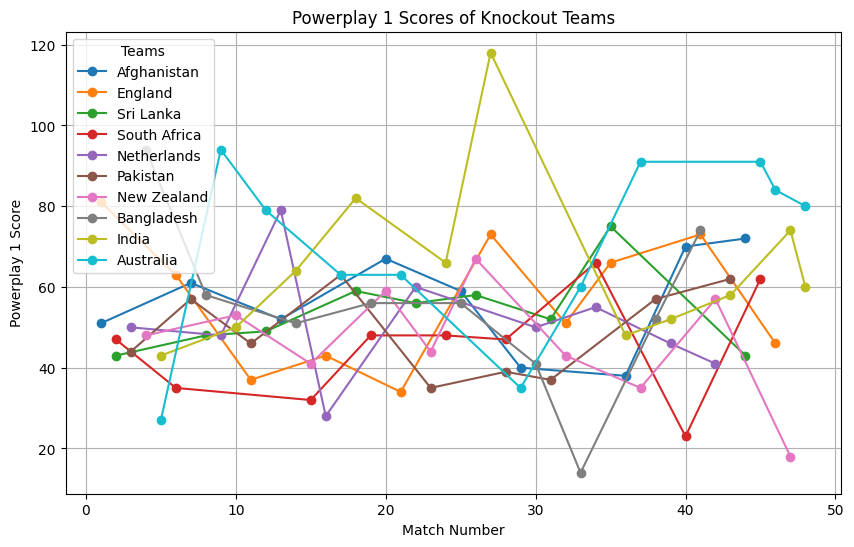

ModuleNotFoundError: No module named 'ace_tools'

In [20]:
import pandas as pd
file_path = '/content/CWC_Campus_Case_Dataset v1.xlsx'

deliveries_df = pd.read_excel(file_path , sheet_name = '2. Dataset - Deliveries')

deliveries_df['ball'] = pd.to_numeric(deliveries_df['ball'], errors='coerce')


# Filter the deliveries that fall within the 1st powerplay (overs 1-10)
powerplay1_deliveries = deliveries_df[(deliveries_df['ball'] >= 0.1) & (deliveries_df['ball'] <= 10)]

# a) Top 5 batsmen who scored the maximum number of runs during the first powerplay
top_batsmen = powerplay1_deliveries.groupby(['striker', 'batting_team']).agg({
    'Total Run': 'sum',
    'match_id': 'nunique'
}).reset_index()

# Sorting to get top 5 batsmen
top_batsmen = top_batsmen.sort_values(by='Total Run', ascending=False).head(5)

# b) Top 5 bowlers who took the maximum wickets during the first powerplay
top_bowlers = powerplay1_deliveries[powerplay1_deliveries['wicket_type'] != 0].groupby(['bowler', 'bowling_team']).agg({
    'wicket_type': 'count',
    'match_id': 'nunique'
}).reset_index()

# Sorting to get top 5 bowlers
top_bowlers = top_bowlers.sort_values(by='wicket_type', ascending=False).head(5)

# c) For teams that reached the knockout phase, create a line chart with match number on the X-axis and their powerplay score on the Y-axis
# Assuming 'knockout_teams' are teams that reached knockout phase (this needs to be provided or assumed based on additional data)
# For now, assuming we are analyzing all teams.

knockout_teams = powerplay1_deliveries['batting_team'].unique()  # replace with actual knockout teams list if available

knockout_scores = powerplay1_deliveries[powerplay1_deliveries['batting_team'].isin(knockout_teams)].groupby(['match_id', 'batting_team']).agg({
    'Total Run': 'sum'
}).reset_index()

import matplotlib.pyplot as plt

# Plotting line chart for each team
plt.figure(figsize=(10, 6))

for team in knockout_teams:
    team_scores = knockout_scores[knockout_scores['batting_team'] == team]
    plt.plot(team_scores['match_id'], team_scores['Total Run'], marker='o', label=team)

plt.title('Powerplay 1 Scores of Knockout Teams')
plt.xlabel('Match Number')
plt.ylabel('Powerplay 1 Score')
plt.legend(title='Teams')
plt.grid(True)
plt.show()

# Display the top 5 batsmen and bowlers
import ace_tools as tools; tools.display_dataframe_to_user(name="Top 5 Batsmen in Powerplay 1", dataframe=top_batsmen)
import ace_tools as tools; tools.display_dataframe_to_user(name="Top 5 Bowlers in Powerplay 1", dataframe=top_bowlers)

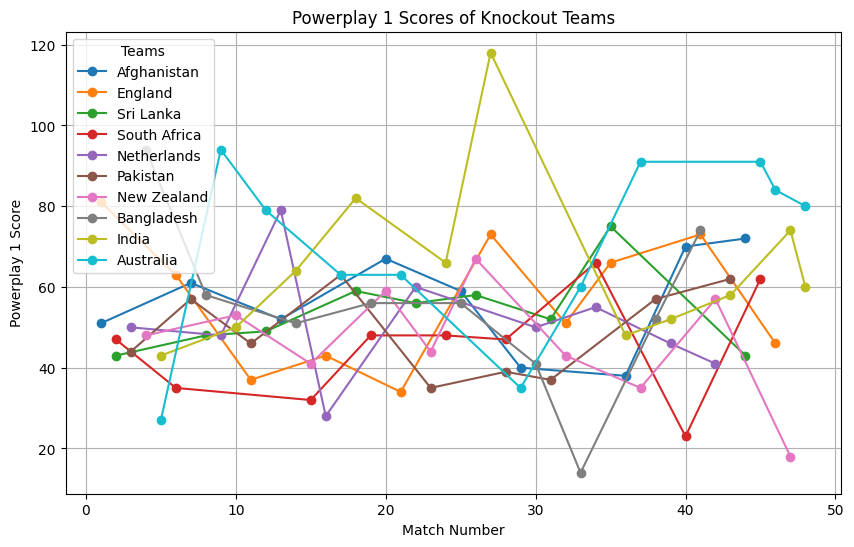

Top 5 Batsmen in Powerplay 1:
           striker batting_team  Total Run  match_id
10       DA Warner    Australia        412        11
45       RG Sharma        India        276        11
24     JM Bairstow      England        238        10
19  Ibrahim Zadran  Afghanistan        237         9
8          C Green    Australia        216         9

Top 5 Bowlers in Powerplay 1:
               bowler bowling_team  wicket_type  match_id
40         MS Chapman  New Zealand           12         9
46  Mustafizur Rahman   Bangladesh            9         9
1             A Zampa    Australia            9         7
23          JJ Bumrah        India            8        11
24       JR Hazlewood    Australia            7        11


In [22]:
import pandas as pd
file_path = '/content/CWC_Campus_Case_Dataset v1.xlsx'

deliveries_df = pd.read_excel(file_path , sheet_name = '2. Dataset - Deliveries')

deliveries_df['ball'] = pd.to_numeric(deliveries_df['ball'], errors='coerce')


# Filter the deliveries that fall within the 1st powerplay (overs 1-10)
powerplay1_deliveries = deliveries_df[(deliveries_df['ball'] >= 0.1) & (deliveries_df['ball'] <= 10)]

# a) Top 5 batsmen who scored the maximum number of runs during the first powerplay
top_batsmen = powerplay1_deliveries.groupby(['striker', 'batting_team']).agg({
    'Total Run': 'sum',
    'match_id': 'nunique'
}).reset_index()

# Sorting to get top 5 batsmen
top_batsmen = top_batsmen.sort_values(by='Total Run', ascending=False).head(5)

# b) Top 5 bowlers who took the maximum wickets during the first powerplay
top_bowlers = powerplay1_deliveries[powerplay1_deliveries['wicket_type'] != 0].groupby(['bowler', 'bowling_team']).agg({
    'wicket_type': 'count',
    'match_id': 'nunique'
}).reset_index()

# Sorting to get top 5 bowlers
top_bowlers = top_bowlers.sort_values(by='wicket_type', ascending=False).head(5)

# c) For teams that reached the knockout phase, create a line chart with match number on the X-axis and their powerplay score on the Y-axis
# Assuming 'knockout_teams' are teams that reached knockout phase (this needs to be provided or assumed based on additional data)
# For now, assuming we are analyzing all teams.

knockout_teams = powerplay1_deliveries['batting_team'].unique()  # replace with actual knockout teams list if available

knockout_scores = powerplay1_deliveries[powerplay1_deliveries['batting_team'].isin(knockout_teams)].groupby(['match_id', 'batting_team']).agg({
    'Total Run': 'sum'
}).reset_index()

import matplotlib.pyplot as plt

# Plotting line chart for each team
plt.figure(figsize=(10, 6))

for team in knockout_teams:
    team_scores = knockout_scores[knockout_scores['batting_team'] == team]
    plt.plot(team_scores['match_id'], team_scores['Total Run'], marker='o', label=team)

plt.title('Powerplay 1 Scores of Knockout Teams')
plt.xlabel('Match Number')
plt.ylabel('Powerplay 1 Score')
plt.legend(title='Teams')
plt.grid(True)
plt.show()

# Display the top 5 batsmen and bowlers
# It seems like 'ace_tools' is a custom module. If you don't have it, you can simply display the dataframes using pandas
print("Top 5 Batsmen in Powerplay 1:")
print(top_batsmen)

print("\nTop 5 Bowlers in Powerplay 1:")
print(top_bowlers)

In [27]:
import pandas as pd
file_path = '/content/CWC_Campus_Case_Dataset v1.xlsx'

deliveries_df = pd.read_excel(file_path , sheet_name = '2. Dataset - Deliveries')

# Creating a new column that identifies partnerships as a tuple of the two batsmen
deliveries_df['partnership'] = deliveries_df.apply(lambda row: tuple(sorted([row['striker'], row['non_striker']])), axis=1)

# Grouping the data by partnership to calculate the required metrics
partnership_stats = deliveries_df.groupby('partnership').agg({
    'match_id': 'nunique',
    'striker': 'count',  # Counting the number of balls faced by the partnership
    'Total Run': 'sum',
    'wicket_type': lambda x: x.isna().sum(),  # Counting not outs as the number of times partnership wasn't broken
    'ball': 'count',
    'runs_off_bat': 'sum'
}).reset_index()

# Calculating the additional required metrics
partnership_stats['strike_rate'] = (partnership_stats['Total Run'] / partnership_stats['ball']) * 100
partnership_stats['average_partnership'] = partnership_stats['Total Run'] / (partnership_stats['striker'] - partnership_stats['wicket_type'])
partnership_stats['balls_per_boundary'] = partnership_stats['ball'] / partnership_stats['runs_off_bat']
partnership_stats['percent_runs_in_boundary'] = (partnership_stats['runs_off_bat'] / partnership_stats['Total Run']) * 100

# Sorting to get the top 7 partnerships by total runs scored
top_partnerships = partnership_stats.sort_values(by='Total Run', ascending=False).head(7)

# Selecting relevant columns for display
top_partnerships_display = top_partnerships[['partnership', 'match_id', 'wicket_type', 'Total Run', 'ball', 'strike_rate', 'average_partnership', 'balls_per_boundary', 'percent_runs_in_boundary']]
top_partnerships_display.columns = ['Batters', 'Innings', 'Not-Outs', 'Runs', 'Balls', 'Strike Rate', 'Average Partnership', 'Number of Balls/Boundary', '% Runs in Boundary']

import ace_tools as tools; tools.display_dataframe_to_user(name="Top 7 Batting Partnerships", dataframe=top_partnerships_display)

ModuleNotFoundError: No module named 'ace_tools'

In [28]:
import pandas as pd
file_path = '/content/CWC_Campus_Case_Dataset v1.xlsx'

deliveries_df = pd.read_excel(file_path , sheet_name = '2. Dataset - Deliveries')

# Creating a new column that identifies partnerships as a tuple of the two batsmen
deliveries_df['partnership'] = deliveries_df.apply(lambda row: tuple(sorted([row['striker'], row['non_striker']])), axis=1)

# Grouping the data by partnership to calculate the required metrics
partnership_stats = deliveries_df.groupby('partnership').agg({
    'match_id': 'nunique',
    'striker': 'count',  # Counting the number of balls faced by the partnership
    'Total Run': 'sum',
    'wicket_type': lambda x: x.isna().sum(),  # Counting not outs as the number of times partnership wasn't broken
    'ball': 'count',
    'runs_off_bat': 'sum'
}).reset_index()

# Calculating the additional required metrics
partnership_stats['strike_rate'] = (partnership_stats['Total Run'] / partnership_stats['ball']) * 100
partnership_stats['average_partnership'] = partnership_stats['Total Run'] / (partnership_stats['striker'] - partnership_stats['wicket_type'])
partnership_stats['balls_per_boundary'] = partnership_stats['ball'] / partnership_stats['runs_off_bat']
partnership_stats['percent_runs_in_boundary'] = (partnership_stats['runs_off_bat'] / partnership_stats['Total Run']) * 100

# Sorting to get the top 7 partnerships by total runs scored
top_partnerships = partnership_stats.sort_values(by='Total Run', ascending=False).head(7)

# Selecting relevant columns for display
top_partnerships_display = top_partnerships[['partnership', 'match_id', 'wicket_type', 'Total Run', 'ball', 'strike_rate', 'average_partnership', 'balls_per_boundary', 'percent_runs_in_boundary']]
top_partnerships_display.columns = ['Batters', 'Innings', 'Not-Outs', 'Runs', 'Balls', 'Strike Rate', 'Average Partnership', 'Number of Balls/Boundary', '% Runs in Boundary']

# If 'ace_tools' is not available, display the DataFrame using pandas:
print("Top 7 Batting Partnerships")
print(top_partnerships_display) # Directly display the DataFrame

Top 7 Batting Partnerships
                          Batters  Innings  Not-Outs  Runs  Balls  \
254    (M Labuschagne, SPD Smith)        9       538   542    546   
190     (Ishan Kishan, RG Sharma)        7       443   502    450   
72           (C Green, DA Warner)        9       370   475    379   
201        (JE Root, JM Bairstow)        5       406   469    410   
123       (DP Conway, R Ravindra)        6       473   466    479   
273  (MP O'Dowd, Vikramjit Singh)        9       496   456    505   
146       (GJ Maxwell, SPD Smith)        5       500   391    504   

     Strike Rate  Average Partnership  Number of Balls/Boundary  \
254    99.267399            67.750000                  1.045977   
190   111.555556            71.714286                  0.943396   
72    125.329815            52.777778                  0.829322   
201   114.390244           117.250000                  0.917226   
123    97.286013            77.666667                  1.073991   
273    90.297030  